In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import cm, dates

In [2]:
# Visualisation args
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
barcolors = ['#87B88C','#9ED2A1','#E7E8CB','#48A0C9','#2A58A1','#2E8B55','#DF3659','Grey']
barstyle = {"edgecolor":"black", "linewidth":1}
penguins = sns.load_dataset("penguins")

In [3]:
df = pd.read_csv('total_tweets.csv')

In [109]:
count_posts_by_user = df.groupby('username').agg(post_count=('username', 'count')).reset_index()

#count_posts_by_user.sort_values(by='post_count', ascending=False)
count_posts_by_user = count_posts_by_user.groupby('post_count').agg(users_count=('username', 'count')).reset_index()
count_posts_by_user

,post_count,users_count
0,1,5431
1,2,869
2,3,346
3,4,172
4,5,90
5,6,71
6,7,53
7,8,42
8,9,26
9,10,13


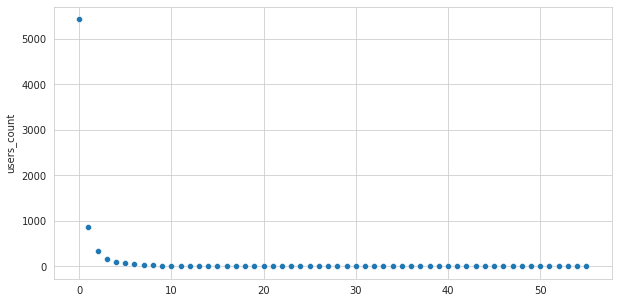

In [119]:
fig = plt.figure(figsize=(10,5))
sns.scatterplot( data=count_posts_by_user['users_count'])

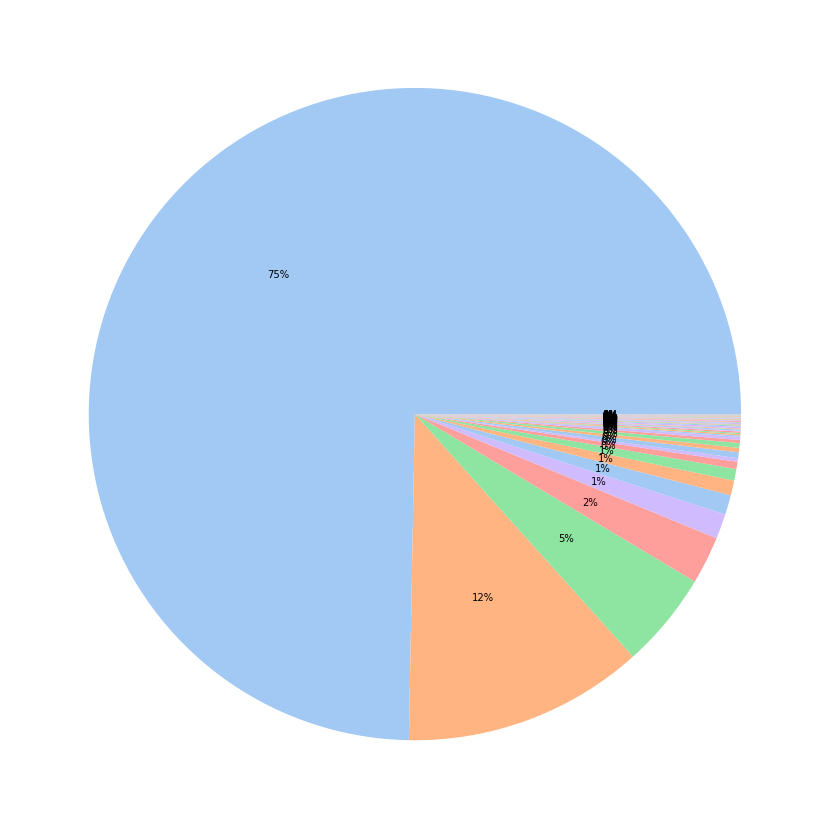

In [35]:
#define data
#data = [15, 25, 25, 30, 5]
#labels = ['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5']

fig = plt.figure(figsize=(20,15))

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(count_posts_by_user['users_count'], colors = colors, autopct='%.0f%%')
plt.show()

In [90]:
bins = [-1, 5, 25, 70, 100]
labels = ["less than 5%","between 5-25%", "between 25-70%", "more than 70%"]

data_per = count_posts_by_user.groupby('post_count')\
.agg(
    percentage = ('users_count', lambda p: int(p / count_posts_by_user['users_count'].sum() * 100)))\
.reset_index()

data_per['percentage_cat'] = pd.cut(data_per['percentage'], bins=bins, labels=labels)
#data_per_final = data_per.groupby('percentage_cat')['post_count'].sum().reset_index().sort_values(ascending=True, by='post_count')

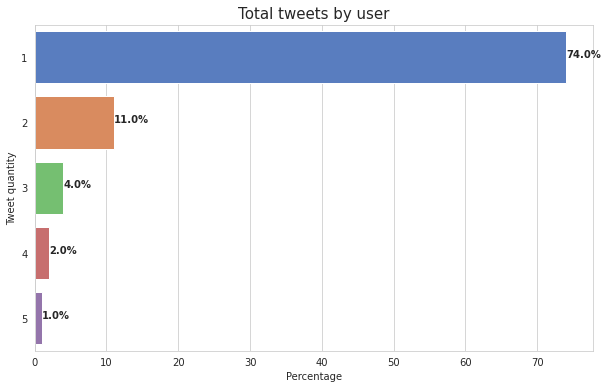

In [104]:
#Seaborn Horizontal barplot
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x="percentage", y="post_count", data=data_per.head(5), ci=None, palette="muted",orient='h' )
ax.set_title("Total tweets by user", fontsize=15)
ax.set_xlabel ("Percentage")
ax.set_ylabel ("Tweet quantity")
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.1f%%"% rect.get_width(), weight='bold' )
#bar.savefig("Seaborn_Bar_Vertical.png");